<a href="https://colab.research.google.com/github/ClovisMonteiro/CCIA/blob/main/CCIA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# PROCESSO SELETIVO CCIA – HACKATON

## Projeto prático para demonstrar conhecimentos na área de Ciência de Dados utilizando a linguagem de programação Python

##### Por Clovis Monteiro da Silva Filho

Objetivo: Realizar a criação de um modelo de previsão da velocidade do vento a 50 metros de altura para 3h à frente a partir de dados de torres anemométricas da plataforma SONDA – Estação de Petrolina.

# ETAPA 1 

In [1]:
# Carregando os pacores necessários para o tratamento dos dados

import pandas as pd
import os
import matplotlib.pyplot as plt

%matplotlib inline

import numpy as np
import seaborn as sns

In [2]:
os.listdir("./")

['.config', 'teste.csv', 'treino.csv', 'sample_data']

### • Lendo os arquivos de dados

In [3]:
# Abrindo o arquivo de treino
treino = pd.read_csv("treino.csv", sep=',', encoding='utf-8')

In [4]:
# Verificando o tipo de cada coluna
treino.dtypes

ano                       int64
dia                       int64
data-hora                object
minuto                    int64
velocidde-vento-25m     float64
direcao-vento-25m       float64
temperatura-25m         float64
velocidade-vento-50m    float64
direcao-vento-50m       float64
temratura-50m           float64
dtype: object

In [5]:
teste = pd.read_csv("teste.csv", sep=',', encoding='utf-8')

In [6]:
teste.dtypes

ano                       int64
dia                       int64
data-hora                object
minuto                    int64
velocidde-vento-25m     float64
direcao-vento-25m       float64
temperatura-25m         float64
velocidade-vento-50m    float64
direcao-vento-50m       float64
temratura-50m           float64
dtype: object

### • Alterando o nome das colunas colunas “temratura-50m” e “velocidde-vento-25m” para “temperatura-50m” e “velocidade-vento-25m”

In [7]:
treino.rename(columns={'temratura-50m': 'temperatura-50m', 'velocidde-vento-25m':'velocidade-vento-25m'}, inplace=True)

In [8]:
teste.rename(columns={'temratura-50m': 'temperatura-50m', 'velocidde-vento-25m':'velocidade-vento-25m'}, inplace=True)

### •	Exiba os 5 primeiros elementos do dataset de treino e de teste

In [9]:
treino.head(5)

,ano,dia,data-hora,minuto,velocidade-vento-25m,direcao-vento-25m,temperatura-25m,velocidade-vento-50m,direcao-vento-50m,temperatura-50m
0,2010,1,2010-1-1 00:00:00,0,0.881500,298.333333,24.868333,0.932500,318.233333,24.888333
1,2010,1,2010-1-1 01:00:00,60,1.366167,329.533333,24.826667,1.825333,321.100000,24.858333
2,2010,1,2010-1-1 02:00:00,120,1.118667,290.233333,24.648333,2.170333,276.033333,25.133333
3,2010,1,2010-1-1 03:00:00,180,0.618000,196.950000,23.916667,1.472500,218.800000,24.268333
4,2010,1,2010-1-1 04:00:00,240,1.517833,117.183333,23.740000,2.058333,130.333333,23.801667


In [10]:
teste.head(5)

,ano,dia,data-hora,minuto,velocidade-vento-25m,direcao-vento-25m,temperatura-25m,velocidade-vento-50m,direcao-vento-50m,temperatura-50m
0,2010,278,2010-10-5 08:00:00,480,3.257333,139.116667,21.621667,4.960833,133.550000,21.283333
1,2010,278,2010-10-5 09:00:00,540,2.786167,143.883333,22.186667,3.783000,138.800000,21.550000
2,2010,278,2010-10-5 10:00:00,600,5.204167,144.983333,23.358333,6.489667,140.066667,22.695000
3,2010,278,2010-10-5 11:00:00,660,5.404333,133.116667,25.068333,6.390000,128.200000,24.313333
4,2010,278,2010-10-5 12:00:00,720,5.333167,139.266667,26.551667,6.098167,134.283333,25.748333


### • Exibindo a quantidade total de elementos nas tabelas e a média dos valores da coluna velocidade-vento-50m

In [11]:
#Quantidade total de elementos nas tabelas

print("O arquivo de treino possui:"+ str(treino.shape[0]) + " linhas e " + str(treino.shape[1]) + " colunas. ")
print("O arquivo de teste possui:"+ str(teste.shape[0]) + " linhas e " + str(teste.shape[1]) + " colunas. ")

O arquivo de treino possui:6656 linhas e 10 colunas. 
O arquivo de teste possui:1000 linhas e 10 colunas. 


In [12]:
# Média dos valores da coluna  "velocidade-vento-50m"

print("Dataset de treino possui a coluna 'velocidade-vento-50m' com média : %.2f" % treino['velocidade-vento-50m'].mean() +".")

Dataset de treino possui a coluna 'velocidade-vento-50m' com média : 5.02.


In [13]:
print("Dataset de teste possui a coluna 'velocidade-vento-50m' com média : %.2f" % teste['velocidade-vento-50m'].mean() +".")

Dataset de teste possui a coluna 'velocidade-vento-50m' com média : 5.02.


In [14]:
# Exibindo médias completas e separadas
teste['velocidade-vento-50m'].mean()

5.022554333333336

In [15]:
treino['velocidade-vento-50m'].mean()

5.016940604967936

## •	Exiba qual Data apresentou o maior valor de velocidade-vento-50m;

A melhor lógica pensada para esse caso foi ordenar a tabela do maior para o melhor e consultar o maior valor existente na coluna, em seguida pegar o dado na coluna de hora

In [16]:
# verificando qual é o maior valor existente no dataset de treino
treino['velocidade-vento-50m'].sort_values(ascending=False)

6085    10.521667
1178    10.276667
1177    10.056667
6359    10.020000
1198     9.990833
          ...    
2096     0.364667
947      0.358500
3201     0.339667
20       0.334500
48       0.097167
Name: velocidade-vento-50m, Length: 6656, dtype: float64

In [17]:
# mostrando as informações do maior valor
treino.loc[6085:6085]

,ano,dia,data-hora,minuto,velocidade-vento-25m,direcao-vento-25m,temperatura-25m,velocidade-vento-50m,direcao-vento-50m,temperatura-50m
6085,2010,254,2010-9-11 13:00:00,780,8.553333,160.916667,22.681667,10.521667,156.2,21.91


In [18]:
treino.iloc[6085]['data-hora']

'2010-9-11 13:00:00'

In [19]:
print(" A data que apresentou maior valor de velocidade foi: " + treino.iloc[6085]['data-hora'][0:10]+".")

 A data que apresentou maior valor de velocidade foi: 2010-9-11 .


In [20]:
# verificando qual é o maior valor existente no dataset de teste

teste['velocidade-vento-50m'].sort_values(ascending=False)

517    9.985000
209    9.765000
844    9.586667
833    9.483333
233    9.456667
         ...   
529    0.703833
972    0.701167
571    0.588167
365    0.577000
526    0.269833
Name: velocidade-vento-50m, Length: 1000, dtype: float64

In [21]:
treino.loc[517:517]

,ano,dia,data-hora,minuto,velocidade-vento-25m,direcao-vento-25m,temperatura-25m,velocidade-vento-50m,direcao-vento-50m,temperatura-50m
517,2010,22,2010-1-22 13:00:00,780,4.910333,98.9,27.07,5.557,94.316667,26.295


In [22]:
teste.iloc[517]['data-hora']

'2010-10-26 21:00:00'

In [23]:
print(" A data que apresentou maior valor de velocidade foi: " + teste.iloc[517]['data-hora'][0:10]+".")

 A data que apresentou maior valor de velocidade foi: 2010-10-26.


## Análise exploratória dos dados 

In [24]:
import matplotlib.pyplot as plt

In [25]:
# Identificando possíveis análises a partir de avaliação estatística
treino.describe()

,ano,dia,minuto,velocidade-vento-25m,direcao-vento-25m,temperatura-25m,velocidade-vento-50m,direcao-vento-50m,temperatura-50m
count,6656.0,6656.000000,6656.000000,6656.000000,6656.000000,6655.000000,6656.000000,6655.000000,6656.000000
mean,2010.0,139.167067,689.423077,3.780990,145.418534,26.080820,5.016941,139.766473,25.645969
std,0.0,80.065426,415.473115,1.377644,34.336953,3.757746,1.619845,34.142498,3.713573
min,2010.0,1.000000,0.000000,-0.007833,6.557000,16.061667,0.097167,12.635333,16.185000
25%,2010.0,70.000000,300.000000,2.801167,129.045833,23.250000,3.950958,124.326667,22.845000
50%,2010.0,139.000000,660.000000,3.656417,143.908333,25.728333,5.022417,138.533333,25.295833
75%,2010.0,208.250000,1020.000000,4.745625,158.487500,28.778333,6.082958,152.025000,28.353333
max,2010.0,278.000000,1380.000000,8.553333,351.066667,36.400000,10.521667,346.850000,35.753333


In [26]:
teste.describe()

,ano,dia,minuto,velocidade-vento-25m,direcao-vento-25m,temperatura-25m,velocidade-vento-50m,direcao-vento-50m,temperatura-50m
count,1000.0,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,2010.0,298.664000,693.840000,3.894355,134.224431,27.993528,5.022554,129.178476,27.571610
std,0.0,12.035279,414.780541,1.321615,44.395029,3.814328,1.592096,44.847802,3.802059
min,2010.0,278.000000,0.000000,0.522333,17.988000,20.275000,0.269833,11.077000,19.950000
25%,2010.0,288.000000,360.000000,3.042042,109.887500,24.571667,4.104208,105.408333,24.185833
50%,2010.0,299.000000,720.000000,3.868333,128.250000,27.837500,5.079333,123.658333,27.325833
75%,2010.0,309.000000,1080.000000,4.702917,142.620833,31.203333,5.960708,137.091667,30.968750
max,2010.0,319.000000,1380.000000,8.301667,339.750000,36.205000,9.985000,337.083333,35.411667


In [27]:
treino.head()

,ano,dia,data-hora,minuto,velocidade-vento-25m,direcao-vento-25m,temperatura-25m,velocidade-vento-50m,direcao-vento-50m,temperatura-50m
0,2010,1,2010-1-1 00:00:00,0,0.881500,298.333333,24.868333,0.932500,318.233333,24.888333
1,2010,1,2010-1-1 01:00:00,60,1.366167,329.533333,24.826667,1.825333,321.100000,24.858333
2,2010,1,2010-1-1 02:00:00,120,1.118667,290.233333,24.648333,2.170333,276.033333,25.133333
3,2010,1,2010-1-1 03:00:00,180,0.618000,196.950000,23.916667,1.472500,218.800000,24.268333
4,2010,1,2010-1-1 04:00:00,240,1.517833,117.183333,23.740000,2.058333,130.333333,23.801667


In [28]:
mes = treino['data-hora'].str.split("-", expand=True)[1]
treino['mes'] = mes
df_agp = treino.groupby('mes').mean()
df_agp.reset_index(inplace=True)

In [29]:
df_agp.mes = df_agp.mes.astype('int')

In [30]:
df_agp.dtypes

mes                       int64
ano                     float64
dia                     float64
minuto                  float64
velocidade-vento-25m    float64
direcao-vento-25m       float64
temperatura-25m         float64
velocidade-vento-50m    float64
direcao-vento-50m       float64
temperatura-50m         float64
dtype: object

In [31]:
df_agp.round(2)

df_agp = df_agp.sort_values('mes', ascending='True')

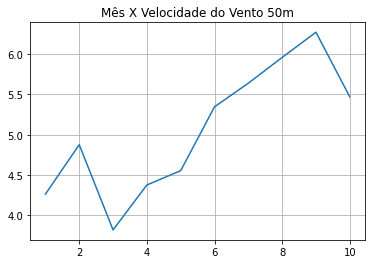

In [32]:
plt.plot(df_agp['mes'], df_agp['velocidade-vento-50m'])
plt.title("Mês X Velocidade do Vento 50m")
plt.grid(True)
plt.show()

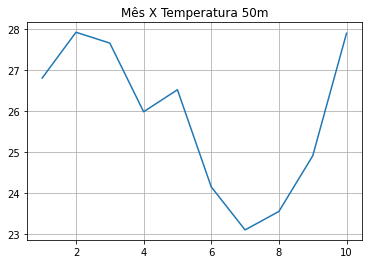

In [33]:
plt.plot(df_agp['mes'], df_agp['temperatura-50m'])
plt.title("Mês X Temperatura 50m")
plt.grid(True)
plt.show()


Com a análise anterior, é possível identificar uma forte relação da valocidade do vento com a temperatura. As duas dimensões na tabela são teoricamente inversamente proporcionais. 

- Quanto maior a temperatura, menor a velocidade do vento.
- Quanto menor a temperatura, maior a velocidade do vento.

obs.: Trabalhei apenas com valores médios para as análises por mês

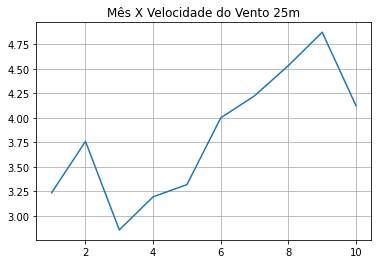

In [34]:
plt.plot(df_agp['mes'], df_agp['velocidade-vento-25m'])
plt.title("Mês X Velocidade do Vento 25m")
plt.grid(True)
plt.show()

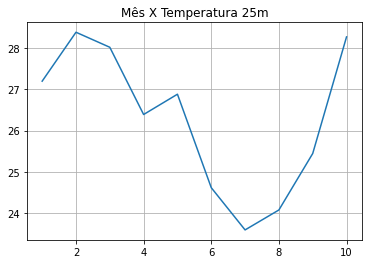

In [35]:
plt.plot(df_agp['mes'], df_agp['temperatura-25m'])
plt.title("Mês X Temperatura 25m")
plt.grid(True)
plt.show()

Acabei não me alongando muito por conta das duas etapas seguintes. Mas tem muita coisa que pode ser analisada ainda

In [36]:
treino.drop(columns="mes", inplace=True)

# Etapa 2

### •	Realizando tratamento para lidar com os dados faltantes

In [37]:
teste.isnull().sum()
#não possui dados faltantes

ano                     0
dia                     0
data-hora               0
minuto                  0
velocidade-vento-25m    0
direcao-vento-25m       0
temperatura-25m         0
velocidade-vento-50m    0
direcao-vento-50m       0
temperatura-50m         0
dtype: int64

In [38]:
treino.isnull().sum()
# será necessário aplicar algum método para substituir o valor nulo
# A minha decisão foi pegar a média dos valores para não pegar um valor fora do real ou que viesse a impactar na análise. 
# Antes do tratamento

ano                     0
dia                     0
data-hora               0
minuto                  0
velocidade-vento-25m    0
direcao-vento-25m       0
temperatura-25m         1
velocidade-vento-50m    0
direcao-vento-50m       1
temperatura-50m         0
dtype: int64

In [39]:
media = treino['temperatura-25m'].mean()
treino['temperatura-25m'] = treino['temperatura-25m'].fillna(media)

In [40]:
media = treino['direcao-vento-50m'].mean()
treino['direcao-vento-50m'] = treino['direcao-vento-50m'].fillna(media)

In [41]:
treino.isnull().sum()
# Depois do tratamento

ano                     0
dia                     0
data-hora               0
minuto                  0
velocidade-vento-25m    0
direcao-vento-25m       0
temperatura-25m         0
velocidade-vento-50m    0
direcao-vento-50m       0
temperatura-50m         0
dtype: int64

### •	Considere as variáveis temporais: ano, dia, data-hora e minuto. Caso deseje, considere transformar as colunas para que elas sejam representadas por valores contínuos. Caso faça isto, disponibilize a função para o tratamento dos dados;

Não ficou claro o que vocês quiseram dizer com "Considere as variáveis temporais: ano, dia, data-hora e minuto. Caso deseje, considere transformar as colunas para que elas sejam representadas por valores contínuos."

- Explicado a falta de compreensão, irei fazer o que eu acho que está correto e espero que entendam

In [42]:
treino.head()

,ano,dia,data-hora,minuto,velocidade-vento-25m,direcao-vento-25m,temperatura-25m,velocidade-vento-50m,direcao-vento-50m,temperatura-50m
0,2010,1,2010-1-1 00:00:00,0,0.881500,298.333333,24.868333,0.932500,318.233333,24.888333
1,2010,1,2010-1-1 01:00:00,60,1.366167,329.533333,24.826667,1.825333,321.100000,24.858333
2,2010,1,2010-1-1 02:00:00,120,1.118667,290.233333,24.648333,2.170333,276.033333,25.133333
3,2010,1,2010-1-1 03:00:00,180,0.618000,196.950000,23.916667,1.472500,218.800000,24.268333
4,2010,1,2010-1-1 04:00:00,240,1.517833,117.183333,23.740000,2.058333,130.333333,23.801667


In [43]:
#treino['data-hora'] = pd.to_datetime(treino['data-hora'])
#teste['data-hora'] = pd.to_datetime(teste['data-hora'])

### •	Divida os dados de treinamento em X_train e y_train.



In [45]:
# TensorFlow e tf.keras
import tensorflow as tf
from tensorflow import keras
import keras
from keras.models import Sequential
from keras.layers import Activation
from keras.layers.core import Dense
from keras.optimizers import Adam
from keras.metrics import categorical_crossentropy



import pickle

print(tf.__version__)

2.5.0


### Matriz de correlação

# <p style='font-size: 18px; line-height: 2; margin: 10px 50px; text-align: justify;'>O <b>coeficiente de correlação</b> é uma medida de associação linear entre duas variáveis e situa-se entre <b>-1</b> e <b>+1</b> sendo que <b>-1</b> indica associação negativa perfeita e <b>+1</b> indica associação positiva perfeita.</p>

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix

from sklearn.model_selection import train_test_split

from keras.optimizers import RMSprop

from keras.utils.np_utils import to_categorical 
from keras.models import Sequential
from keras.layers import Dense

In [62]:
treino.corr().round(4)

# Resultado: Temperatura-25m, possui uma boa coorelação com a variável minuto. 
# as temperaturas também tem ligação direta com a velocidade do vento

,ano,dia,minuto,velocidade-vento-25m,direcao-vento-25m,temperatura-25m,velocidade-vento-50m,direcao-vento-50m,temperatura-50m
ano,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dia,NaN,1.0000,-0.0024,0.3933,0.0552,-0.3167,0.4298,0.0619,-0.3333
minuto,NaN,-0.0024,1.0000,0.1438,0.0009,0.5541,0.0554,0.0069,0.5420
velocidade-vento-25m,NaN,0.3933,0.1438,1.0000,-0.1196,0.0681,0.9425,-0.0993,0.0258
direcao-vento-25m,NaN,0.0552,0.0009,-0.1196,1.0000,-0.1714,-0.0611,0.9685,-0.1627
temperatura-25m,NaN,-0.3167,0.5541,0.0681,-0.1714,1.0000,-0.0571,-0.1742,0.9958
velocidade-vento-50m,NaN,0.4298,0.0554,0.9425,-0.0611,-0.0571,1.0000,-0.0454,-0.0772
direcao-vento-50m,NaN,0.0619,0.0069,-0.0993,0.9685,-0.1742,-0.0454,1.0000,-0.1687
temperatura-50m,NaN,-0.3333,0.5420,0.0258,-0.1627,0.9958,-0.0772,-0.1687,1.0000


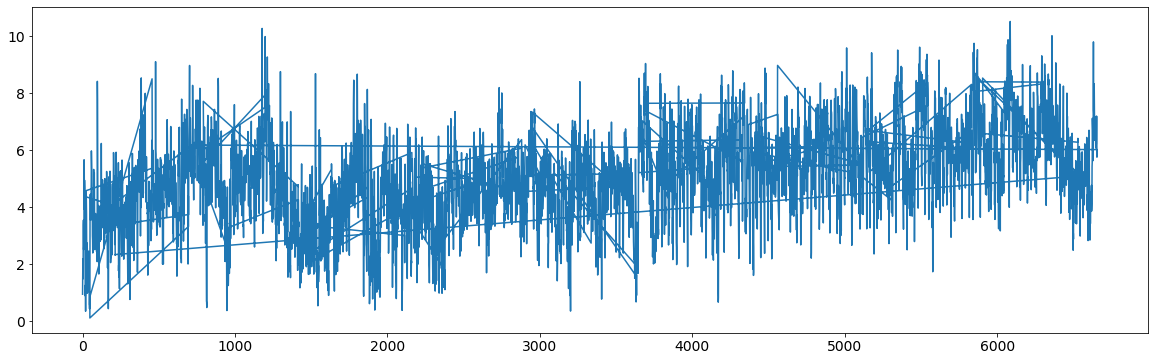

In [58]:
fig, ax = plt.subplots(figsize=(20,6))
ax = treino['velocidade-vento-50m'].plot(fontsize=14)

### Separando uma parte dos dados para validação com os dados de treino

In [49]:
treino.sort_values("data-hora", inplace=True)

# Neste caso, removi as três ultimas horas pois não teriamos informações na tabela de Y_Train
X = treino.drop(columns=['velocidade-vento-50m'])
X_train = X[:-3]

# Utilizei uma lógica simples: por conta dos dados serem contínuos e salvo por hora, apenas ordenei por data e hora e iniciei o dataset apenas da terceita linha, ou seja, 3 horas a mais que o X_train
Y_train = treino[['velocidade-vento-50m']][3:].reset_index().drop(columns='index')


In [53]:
#Categorizando os valores para ficar entre zero e 1
# Y_train = to_categorical(Y_train)

In [54]:
# Separando uma parte dos dados para validação
random_seed = 2
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

In [55]:
X_train.shape,  X_val.shape, Y_train.shape, Y_val.shape

((5388, 9), (599, 9), (5388, 1), (599, 1))

### Separando uma parte dos dados para validação com os dados de teste

In [ ]:
teste.sort_values("data-hora", inplace=True)

# Neste caso, removi as três ultimas horas pois não teriamos informações na tabela de Y_Train
X = teste.drop(columns=['velocidade-vento-50m', 'data-hora'])
X_train_teste = X[:-3]

# Utilizei uma lógica simples: por conta dos dados serem contínuos e salvo por hora, apenas ordenei por data e hora e iniciei o dataset apenas da terceita linha, ou seja, 3 horas a mais que o X_train
Y_train_teste = teste[['velocidade-vento-50m']][3:].reset_index().drop(columns='index')

In [ ]:
# Y_train_test = to_categorical(Y_train)

In [ ]:
random_seed = 2
X_train_test, X_val_test, Y_train_test, Y_val_test = train_test_split(X_train, Y_train, test_size = 0.1, random_state=random_seed)

### Escalonando os dados de entrada

In [ ]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0

In [ ]:
import pickle

output = open('modelo_final.pkl', 'wb')
pickle.dump(X_train, output)
output.close()

### Lixo

In [ ]:
num_classes = len(X)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(25, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(25, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
optimizer = RMSprop(lr=0.001, rho=0.9, epsilon=1e-08, decay=0.0)
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


In [ ]:
teste = model.predict(X_val)

In [ ]:
import pickle

output = open('modelo_final', 'wb')
pickle.dump(modelo, output)
output.close()

In [ ]:
num_classes = len(X)
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(25, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(25, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(num_classes, activation=tf.nn.softmax))
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [ ]:
# model.fit(X, y, epochs=600, batch_size=2)


#model.save('model.h5')
#with open ('preprocessor.pkl', 'wb') as f:
#  pickle.dump(scaler, f)

In [ ]:
model = Sequential([
                    Dense(16, input_shape=(1,), activation='relu'),
                    Dense(32, activation='relu'),
                    Dense(2, activation='sigmoid')
                    ])

In [ ]:
model.compile(Adam(learning_rate=.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
model.loss= 'sparse_categorical_crossentropy'
model.loss

'sparse_categorical_crossentropy'